In [1]:
#!/usr/bin/env python3
import pandas
import matplotlib.pyplot as plt
import numpy
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit

inputdirectory='../data/'
inputfile='data12h_rescaled.csv'
#read and preprocess data
df = pandas.read_csv(inputdirectory+inputfile)
df = df.set_index(df.columns[0], drop = True)
var_names=df.index

In [2]:
#%% Define sigmoid and error functions

def sigmoid(x, a , b, x0, k):
    y = a + (b-a) / (1 + numpy.exp(-k*(x-x0)))
    return (y)

#define "none" function to handle a lack of fit
def none(): 
    pass

def err(T,yreal,fun,pars):
    return numpy.linalg.norm(yreal-fun(T,*pars))

def rescaled_err(T,yreal,fun, pars):
    return err(T,yreal,fun,pars)/(max(yreal)-min(yreal))

In [3]:
#define transition region
trans_reg=[0.05,0.5]
#use log scale for chemical if needed
chem_scale_log=True
#get chemical concentration
TT = numpy.zeros(len(df.columns))
for i in range(len(df.columns)):
    TT[i]=float(df.columns[i])

#convert chemical scale to logarithmic if chem_scale_log=True
if chem_scale_log:
    if TT[0]==0: 
        TT[0]=0.001 #small positive number needed for handling log(0) in log scale
    T = numpy.log2(TT)
    trans_reg=[numpy.log2(trans_reg[0]), numpy.log2(trans_reg[1])]
else:
    T=TT

In [4]:
#Fit response curves
#acceptable error for fitting
max_rescaled_error=0.3
#initialize error and rescaled error
ERROR=numpy.zeros(len(var_names))
RESCALED_ERROR=numpy.zeros(len(var_names))
all_pars = {}
best_fits={}
plot_option=True #Make False if you only want to see the list of predicted genes along with the errors 

import warnings
warnings.filterwarnings('ignore') #ignore warnings from fitting algorithms

for i in range(len(var_names)):
    #print([i,var_names[i]])
    g=var_names[i]
    y=(df.loc[g]).values #response values
    
    #use function created for fitting curves
    method = sigmoid   
    
    #initial guess for parameters
    #initialize threshold (th) estimate close to biggest jump
    j0=0 #j0 will be where biggest jump occurs
    for j in range(len(T)-1): 
        if abs(y[j+1]-y[j])>abs(y[j0+1]-y[j0]): j0=j
    th=(T[j0+1]+T[j0])/2
    k=( (y[j0+1]-y[j0])/(T[j0+1]-T[j0]) )*10/(y[-1]-y[0])
    par0=[y[0],y[-1], th,k]
    #fitting
    pars, pcov = curve_fit(method, T, y,par0, maxfev=100000);
    all_pars[i] = pars
    
    #compute errors
    ERROR[i]=err(T,y,method,pars)
    RESCALED_ERROR[i]=rescaled_err(T,y,method,pars)
    #if error is small enough accept method function as a good fit            
    if RESCALED_ERROR[i]<max_rescaled_error:
        method_name=method.__name__
        best_fits[i]=method
    else:
        method_name="none"
        best_fits[i]=none
        
    selected=False
    method=best_fits[i]
    #check if there was a sigmoidal fit and threshold is inside experimental region
    if method==sigmoid and T[0]<pars[2] and pars[2]<T[-1]:
        th=pars[2]
        k=pars[3]
        L=th-2/k
        M=th+2/k
        #check if region of steep increase [L,M] overlaps transition region trans_reg
        if not (M<trans_reg[0] or trans_reg[1]<L): selected=True

    if selected==True:
        print([var_names[i], " error = "+str(round(RESCALED_ERROR[i],3))])
        

['Axin1', ' error = 0.258']
['Cbx4', ' error = 0.296']
['Ccnl2', ' error = 0.264']
['Cyp26b1', ' error = 0.171']
['Dusp5', ' error = 0.255']
['Eif4a3', ' error = 0.181']
['Has2', ' error = 0.086']
['Id1', ' error = 0.275']
['Mas1', ' error = 0.167']
['Nr4a1', ' error = 0.27']
['Socs1', ' error = 0.14']
['Sqstm1', ' error = 0.285']


['Axin1', ' error = 0.258']
['Cbx4', ' error = 0.296']
['Ccnl2', ' error = 0.264']
['Cyp26b1', ' error = 0.171']
['Dusp5', ' error = 0.255']
['Eif4a3', ' error = 0.181']
['Has2', ' error = 0.086']
['Id1', ' error = 0.275']
['Mas1', ' error = 0.167']
['Nr4a1', ' error = 0.27']
['Socs1', ' error = 0.14']
['Sqstm1', ' error = 0.285']


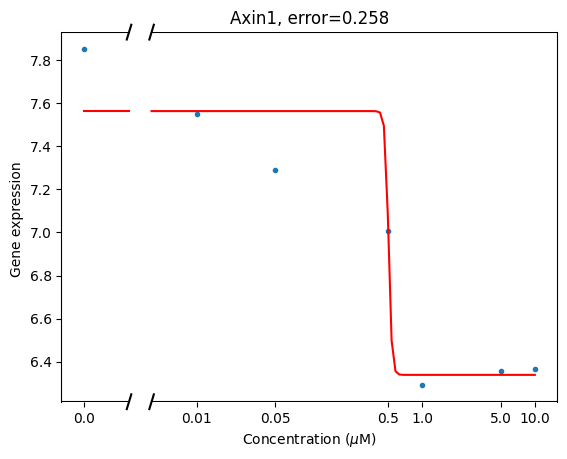

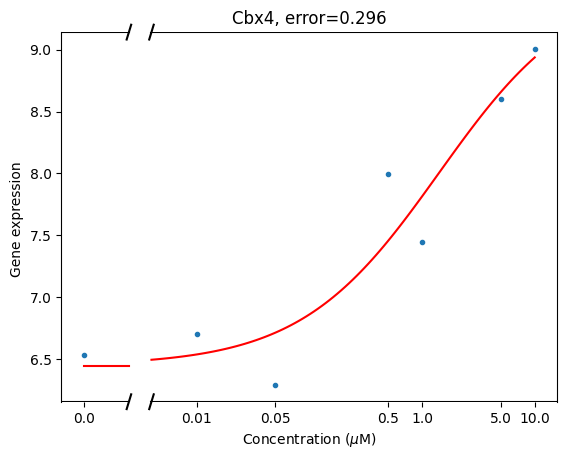

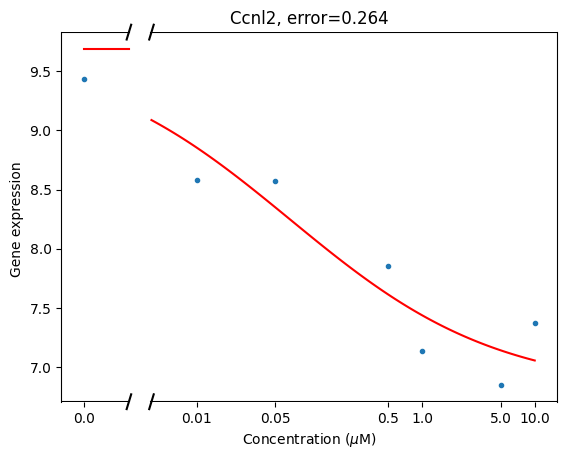

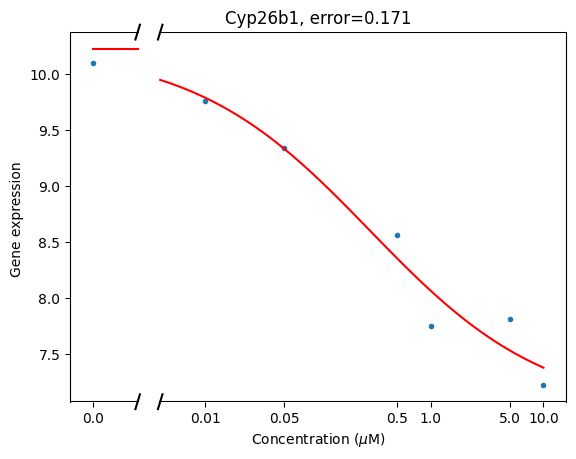

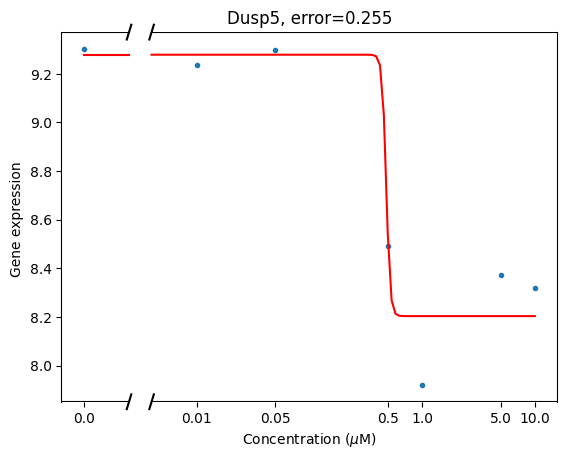

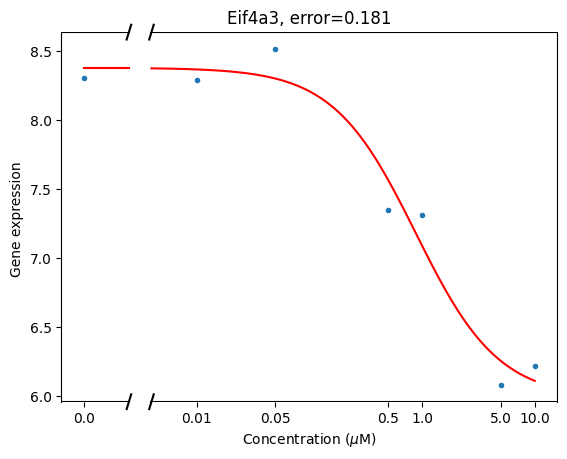

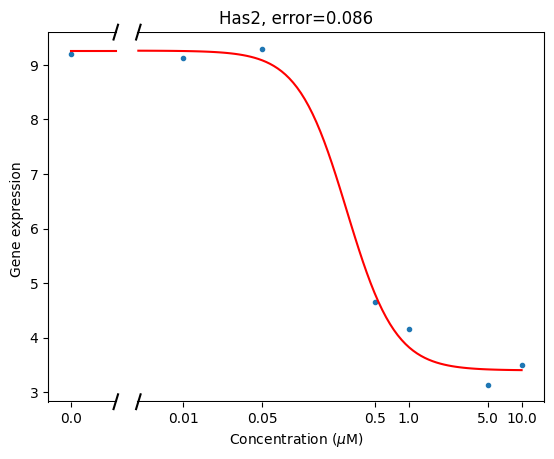

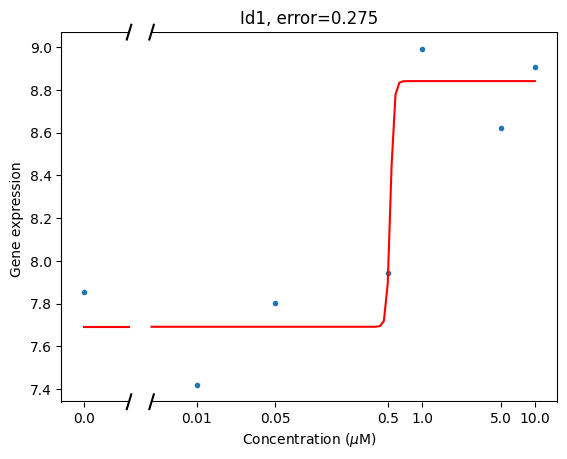

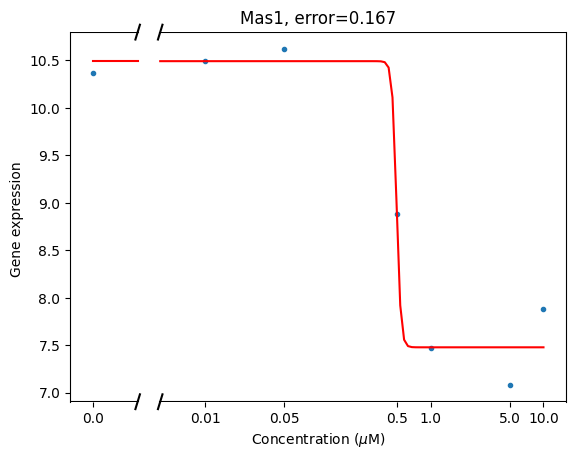

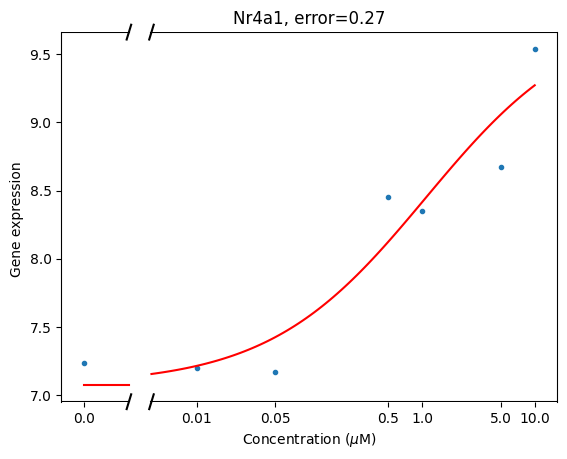

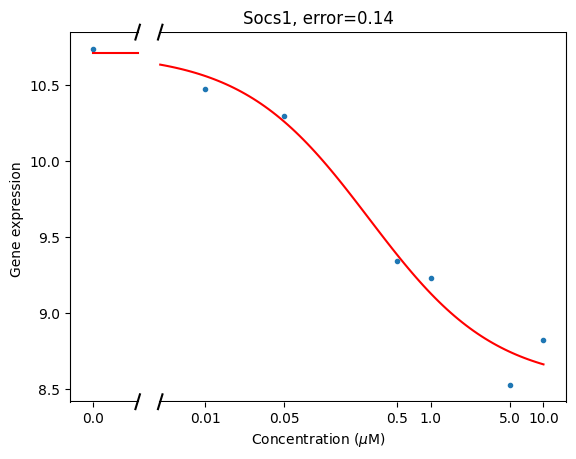

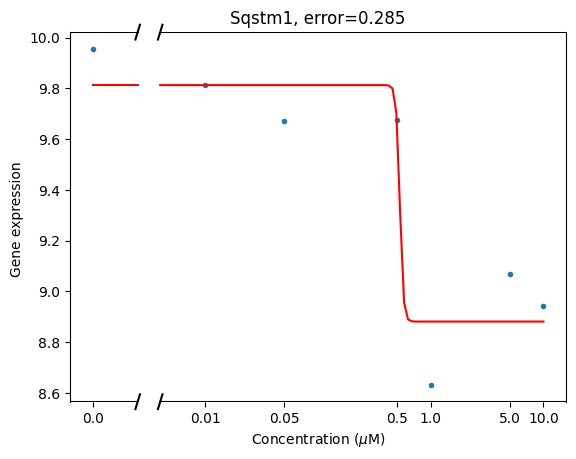

In [5]:
#This is the same as previous cell, but can also plot

#Fit response curves
#acceptable error for fitting
max_rescaled_error=0.3
#initialize error and rescaled error
ERROR=numpy.zeros(len(var_names))
RESCALED_ERROR=numpy.zeros(len(var_names))
all_pars = {}
best_fits={}
plot_option=True #Make False if you only want to see the list of predicted genes along with the errors 

import warnings
warnings.filterwarnings('ignore') #ignore warnings from fitting algorithms

for i in range(len(var_names)):
    #print([i,var_names[i]])
    g=var_names[i]
    y=(df.loc[g]).values #response values
    
    #use function created for fitting curves
    method = sigmoid   
    
    #initial guess for parameters
    #initialize threshold (th) estimate close to biggest jump
    j0=0 #j0 will be where biggest jump occurs
    for j in range(len(T)-1): 
        if abs(y[j+1]-y[j])>abs(y[j0+1]-y[j0]): j0=j
    th=(T[j0+1]+T[j0])/2
    k=( (y[j0+1]-y[j0])/(T[j0+1]-T[j0]) )*10/(y[-1]-y[0])
    par0=[y[0],y[-1], th,k]
    #fitting
    pars, pcov = curve_fit(method, T, y,par0, maxfev=100000);
    all_pars[i] = pars
    
    #compute errors
    ERROR[i]=err(T,y,method,pars)
    RESCALED_ERROR[i]=rescaled_err(T,y,method,pars)
    #if error is small enough accept method function as a good fit            
    if RESCALED_ERROR[i]<max_rescaled_error:
        method_name=method.__name__
        best_fits[i]=method
    else:
        method_name="none"
        best_fits[i]=none
        
    selected=False
    method=best_fits[i]
    #check if there was a sigmoidal fit and threshold is inside experimental region
    if method==sigmoid and T[0]<pars[2] and pars[2]<T[-1]:
        th=pars[2]
        k=pars[3]
        L=th-2/k
        M=th+2/k
        #check if region of steep increase [L,M] overlaps transition region trans_reg
        if not (M<trans_reg[0] or trans_reg[1]<L): selected=True

    if selected==True:
        print([var_names[i], " error = "+str(round(RESCALED_ERROR[i],3))])
        #the following is only for plotting, not needed if only the list of genes is enough
        if plot_option:
            if  not chem_scale_log or (chem_scale_log and float(df.columns[0])!=0):
                yfit = method(x, *pars)   
                fig,ax = plt.subplots(nrows=1,ncols=1)
                ax.set_xticks(T)
                ax.set_xticklabels(TT)
                ax.plot(T,y,'.') 
                ax.plot(x,yfit,'r')
            if chem_scale_log and float(df.columns[0])==0: #plot with broken lines due to log scale
                xcut=T[0]*0.4+T[1]*0.6 #starting value for log scale
                x = numpy.linspace(xcut, T[-1], 100)
                yfit = method(x, *pars) 
                fig,ax = plt.subplots(nrows=1,ncols=1) 
                ax.set_xticks(T[1:])
                ax.set_xticklabels(TT[1:])
                ax.set_xticks(T)
                ax.plot(T,y,'.') 
                ax.plot(x,yfit,'r')  
                xcut0=T[0]*0.6+T[1]*0.4 #ending value for scale that contains 0
                x_near_zero=[T[0],xcut0]
                yfit_near_zero=[pars[0],pars[0]]
                TTplot=TT; TTplot[0]=0
                ax.set_xticklabels(TTplot)
                ax.plot(x_near_zero,yfit_near_zero,'r')
                ylim_val=ax.get_ylim()
                xlim_val=ax.get_xlim()
                dy=(ylim_val[1]-ylim_val[0])/50
                dx=(T[-1]-T[0])/200
                ax.plot([xcut0-dx,xcut0+dx],[ylim_val[0]-dy,ylim_val[0]+dy],'k',clip_on=False)
                ax.plot([xcut-dx,xcut+dx],[ylim_val[0]-dy,ylim_val[0]+dy],'k',clip_on=False)
                ax.plot([xcut0-dx,xcut0+dx],[ylim_val[1]-dy,ylim_val[1]+dy],'k',clip_on=False)
                ax.plot([xcut-dx,xcut+dx],[ylim_val[1]-dy,ylim_val[1]+dy],'k',clip_on=False)
                ax.plot([xlim_val[0],xcut0],[ylim_val[0],ylim_val[0]],'k')
                ax.plot([xcut,xlim_val[1]],[ylim_val[0],ylim_val[0]],'k')
                ax.plot([xlim_val[0],xcut0],[ylim_val[1],ylim_val[1]],'k')
                ax.plot([xcut,xlim_val[1]],[ylim_val[1],ylim_val[1]],'k')
                ax.set_ylim(ylim_val)
                ax.set_xlim(xlim_val)
                ax.spines['top'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
            #plt.ylim(0)#use this to plot starting at 0 vertically
            ax.set_title(str(g) + ", error=" + str(round(RESCALED_ERROR[i],3)))
            plt.xlabel('Concentration '+r'($\mu$'+'M)')
            plt.ylabel('Gene expression ')
            #ax.set_xscale('symlog')
            #plt.show()
            fname=str(g)+'_12h.png'
            plt.savefig(fname)
            
        #break